In [2]:
using Plots
using LinearAlgebra
using STMO

# Motivation

Many more realistic optimization problems are characterized by constraints. For example, real-word systems often satisfy conservation laws, such as conservation of mass, of atoms or of charge. When designing objects, there are practical constraints of feasible dimensions, range of operations and limitations in materials. Another example is in probability, where a solution should satisfy the axioms of probability theory (probabilities are real values between 0 and 1 and the probabilities of all events should sum to 1).

Other cases, we include constraints in our problem because they encode prior knowledge about the problem or to obtain solutions with certain desirable properties.

In this chapter we discuss convex optimization problems with linear equality constraints (constraining the solution to a linear subspace) and convex inequality constrains (constraining the solution to convex subspace). Both types of constraints result again in a convex optimization problem.

# Lagrange multipliers

Lagrange multipliers are elegant ways of finding stationary points of a function of several variables given one or more constraints. We give a short introduction based on a geometric perspective.

> IMPORTANT: most textbooks treat Lagrange multipliers from as maximization problems. Here they are treated as minimization problems to be consistent with other chapters.

## Equality constraints

Consider the following optimization problem:

$$
\min_{\mathbf{x}} f(\mathbf{x})
$$
$$
\text{subject to } g(\mathbf{x})=0\,.
$$

![Convex optimization problem with an equality constraint. Here, the constraint is nonlinear.](Figures/Lagr1.png)

For every point $\mathbf{x}$ on the surface $g(\mathbf{x})=0$, the gradient $\nabla g(\mathbf{x})$ is normal to this surface. This can be shown by considering a point $\mathbf{x}+\boldsymbol{\epsilon}$, also on the surface. If we make a Taylor expansion around $\mathbf{x}$, we have

$$
g(\mathbf{x}+\boldsymbol{\epsilon})\approx g(\mathbf{x}) + \boldsymbol{\epsilon}^\top\nabla g(\mathbf{x})\,.
$$

Given that both $\mathbf{x}$ and $\mathbf{x}+\boldsymbol{\epsilon}$ lie on the surface it follows that $g(\mathbf{x}+\boldsymbol{\epsilon})= g(\mathbf{x})$. In the limit that $||\boldsymbol{\epsilon}||\rightarrow 0$ we have that $\boldsymbol{\epsilon}^\top\nabla g(\mathbf{x})=0$. Because $\boldsymbol{\epsilon}$ is parallel to the surface $g(\mathbf{x})$, it follows that $\nabla g(\mathbf{x})$ is normal to the surface.

![The same optimization problem, with some gradients of $f(\mathbf{x})$ and $g(\mathbf{x})$ shown.](Figures/Lagr2.png)

We seek a point $\mathbf{x}^\star$ on the surface such that $f(\mathbf{x})$ is minimized. For such a point, it should hold that the gradient w.r.t. $f$ should be parallel to $\nabla g$. Otherwise, it would be possible to give a small 'nudge' to $\mathbf{x}^\star$ in the direction of $\nabla f$ to decrease the function value, which would indicate that $\mathbf{x}^\star$ is not a minimizer. This figures below illustrate this point.

![Point on the surface that is *not* a minimizer.](Figures/Lagr3.png)

![Point on the surface that is a minimizer of $f$.](Figures/Lagr4.png)

$$
\nabla f(\mathbf{x}^\star) + \nu \nabla g (\mathbf{x}^\star)=0\,,
$$
with $\nu\neq 0$ called the *Lagrange multiplier*. The constrained minimization problem can also be represented by a *Lagrangian*:
$$
L(\mathbf{x}, \nu) 	\equiv f(\mathbf{x}) + \nu g(\mathbf{x})\,.
$$
The constrained stationary condition is obtained by setting $\nabla_\mathbf{x} L(\mathbf{x}, \nu) =0$, the condition $\partial  L(\mathbf{x}, \nu)/\partial \nu=0$ leads to the constraint equation $g(\mathbf{x})=0$.

## Inequality constraints

The same argument can be made for inequality constraints, i.e. solving

$$
\min_{\mathbf{x}} f(\mathbf{x})
$$
$$
\text{subject to } g(\mathbf{x})\leq0\,.
$$

Here, two situations can arise:

- **Inactive constraint**: the minimizer of $f$ lies in the region where $g(\mathbf{x}) < 0$. This corresponds to a Lagrange multiplier $\nu=0$. Note that the solution would be the same if the constraint was not present.
- **Active constraint**: the minimizer of $f$ lies in the region where $g(\mathbf{x}) > 0$. The solution of the constrained problem will lie on the bound where $g(\mathbf{x})=0$, similar to the equality-constrained problem and corresponds to a Lagrange multiplier $\nu>0$.

Both scenarios are shown below:

![Constrained minimization problem with an active inequality constraint. Optimum lies within the region where $g(\mathbf{x})\leq 0$. ](Figures/Lagr6.png)

![Constrained minimization problem with an active inequality constraint. Optimum lies on the boundary of the region where $g(\mathbf{x})\leq 0$.](Figures/Lagr5.png)


For both cases, the product $\nu g(\mathbf{x})=0$, the solution should thus satisfy the following conditions:
$$
g(\mathbf{x}) \leq 0
$$
$$
\nu \geq 0
$$
$$
\nu g(\mathbf{x})=0\,.
$$
These are called the *Karush-Kuhn-Tucker* conditions.

It is relatively straightforward to extend this framework towards multiple constraints (equality and inequality) by using several Lagrange multipliers.

# Equality constrained convex optimization

## Problem outline

We will start with convex optimization problems with linear equality constraints:

$$
\min_\mathbf{x} f(\mathbf{x})
$$
$$
\text{subject to } A\mathbf{x}=\mathbf{b}
$$

where $f : \mathbb{R}^n \rightarrow \mathbb{R}$ is convex and twice continuously differentiable and $A\in \mathbb{R}^{p\times n}$ with a rank $p < n$.

The Lagrangian of this problem is

$$
L(\mathbf{x}, \boldsymbol{\nu}) = f(\mathbf{x}) + \boldsymbol{\nu}^\top(A\mathbf{x}-\mathbf{b})\,,
$$
with $\boldsymbol{\nu}\in\mathbb{R}^p$ the vector of Lagrange multipliers.

A point $\mathbf{x}^\star\in$ **dom** $f$ is optimal for the above optimization problem only if there is a $\boldsymbol{\nu}^\star\in\mathbb{R}^p$ such that:

$$
A\mathbf{x}^\star = \mathbf{b}, \qquad \nabla f(\mathbf{x}^\star) + A^\top\boldsymbol{\nu}^\star = 0\,.
$$

We will reuse the same toy examples from the previous chapter, but add an equality constraint to both.

- Simple quadratic problem:

$$
 \min_{\mathbf{x}} \frac{1}{2} (x_1^2 + 4 x_2^2)
$$
$$
 \text{subject to }  x_1 - 2x_2 = 3
$$

- A non-quadratic function:

$$
 \min_{\mathbf{x}}\log(e^{x_1 +3x_2-0.1}+e^{x_1 -3x_2-0.1}+e^{-x_1 -0.1})
$$
$$
 \text{subject to }  x_1 + 3x_2 = 0
$$

In [4]:
import STMO.TestFuns: fquadr, grad_fquadr, hess_fquadr
import STMO.TestFuns: fnonquadr, grad_fnonquadr, hess_fnonquadr

![The two toy functions each with a linear constraint.](Figures/example_functions.png)

## Equality constrained convex quadratic optimization

Consider the following equality constrained convex optimization problem:

$$
\min_\mathbf{x}\frac{1}{2}\mathbf{x}^\top P \mathbf{x} + \mathbf{q}^\top \mathbf{x} + r
$$
$$
\text{subject to }  A\mathbf{x}=\mathbf{b}
$$

where $P$ is symmetric.

The optimality conditions are
$$
A\mathbf{x}^\star = \mathbf{b}, \quad P\mathbf{x}^\star+\mathbf{q} +A^\top\boldsymbol{\nu}^\star=\mathbf{0}\,,
$$
which we can write as

$$
\begin{bmatrix}
P & A^\top \\
A & 0 \\
     \end{bmatrix}
     \begin{bmatrix}
\mathbf{x}^\star\\
\boldsymbol{\nu}^\star
     \end{bmatrix}
     =
     \begin{bmatrix}
-\mathbf{q} \\
\mathbf{b}
     \end{bmatrix}\,.
$$
Note that this is a block matrix.

> If $P$ is positive-definite, the linearly constrained quadratic minimization problem has an unique solution.

Solving this linear system gives both the constrained minimizer $\mathbf{x}^\star$ as well as the Lagrange multipliers.

**Assignment 1**

1. Complete the code to solve linearly constrained quadratic systems.
2. Use this code to solve the quadratic toy problem defined above.

In [1]:
"""
    solve_constrained_quadratic_problem(P, q, A, b)

Solve a linear constrained quadratic convex problem.

Inputs:
    - P, q: quadratic and linear parameters of
            the linear function to be minimized
    - A, b: system of the linear constraints

Outputs:
    - xstar: the exact minimizer
    - nustar: the optimal Lagrange multipliers
"""
function solve_constrained_quadratic_problem(P, q, A, b)
    p, n = size(A)  # size of the problem , p = equality constrains and n is variables
    # complete this code
    solution = [P A'; A zeros(p,p)] \ [-q; b]
    xstar = solution[1:n]
    nustar = solution[(n+1):end]
    return xstar, nustar
end

solve_constrained_quadratic_problem

In [5]:
# solve the quadratic system with the linear constraint
contour(-10:0.1:10, -10:0.1:10, (x1, x2)->fquadr((x1, x2)), xlabel=:x1, ylabel=:x2)
plot!(x1->-(3-x1)/2, -10, 10, color=mygreen, label=:constraint)
xstar, nustar = solve_constrained_quadratic_problem([1 0;0 4], [0,0], [1 -2], 3)
x1star, x2star = xstar
scatter!([x1star], [x2star], color=myorange, label=:minimizer)

LoadError: ArgumentError: unsupported symbol constraint passed to `label`

In [24]:
x1star

-0.2309123589711387

In [23]:
nustar

1-element Array{Float64,1}:
 -1.5

## Newton's method with equality constraints

To derive $\Delta \mathbf{x}_{nt}$ for the following equality constrained problem

$$
\min_\mathbf{x}  f(\mathbf{x})
$$
$$
\text{subject to }  A\mathbf{x}=\mathbf{b}
$$

we apply a second-order Taylor approximation at the point $\mathbf{x}$, to obtain

$$
\min_\mathbf{v} \hat{f}(\mathbf{x} +\mathbf{v}) = f(\mathbf{x}) +\nabla f(\mathbf{x})^\top \mathbf{v}+ \frac{1}{2}\mathbf{v}^\top \nabla^2 f(\mathbf{x}) \mathbf{v}
$$
$$
\text{subject to } A(\mathbf{x}+\mathbf{v})=\mathbf{b}\,.
$$

Based on the solution of quadratic convex problems with linear constraints, the Newton $\Delta \mathbf{x}_{nt}$ step is characterized by

$$
\begin{bmatrix}
 \nabla^2 f(\mathbf{x})&  A^\top \\
A & 0 \\
     \end{bmatrix}
     \begin{bmatrix}
\Delta \mathbf{x}_{nt}\\
\mathbf{w}
     \end{bmatrix}
     =
     -\begin{bmatrix}
\nabla f(\mathbf{x}) \\
A\mathbf{x}-\mathbf{b}
     \end{bmatrix}
$$

- If the starting point $\mathbf{x}^{(0)}$ is chosen such that $A\mathbf{x}^{(0)}=\mathbf{b}$, the residual term vanishes and steps will remain in the feasible region. This is the **feasible start Newton method**.
- If we choose an arbitrary $\mathbf{x}^{(0)}\in$ **dom** $f$, not satisfying the constraints, this is the **infeasible start Newton method**. It will usually converge rapidly to the feasible region (check the final solution!).

Note that when we start at a feasible point, the residual vector $-(A\mathbf{x}-\mathbf{b})$ vanishes and the path will always remain in a feasible region. Otherwise we will converge to it.

In this chapter, we will use a fixed step size. For Newton's method this usually leads to only a few extra iterations compared to an adaptive step size.

>**input** starting point $\mathbf{x}\in$ **dom** $f$ (with $A\mathbf{x}=\mathbf{b}$ if using the feasible method), tolerance $\epsilon>0$.
>
>**repeat**
>
>>    1. Compute the Newton step $\Delta \mathbf{x}_{nt}$ and decrement $\lambda(\mathbf{x})$.
>>    2. *Stopping criterion*. **break** if $\lambda^2/2\leq \epsilon$.
>>    3. *Choose step size $t$*: either by line search or fixed $t$.
>>    4. *Update*. $\mathbf{x}:=\mathbf{x}+t \Delta \mathbf{x}_{nt}$.
>
>**output** $\mathbf{x}$

Again, the convergence can be monitored using the Newton decrement:

$$
\lambda^2(\mathbf{x}) = \Delta \mathbf{x}_{nt}^\top \nabla^2 f(\mathbf{x})\Delta \mathbf{x}_{nt}\,.
$$

The algorithm terminates when

$$
\frac{\lambda(\mathbf{x})^2}{2} < \epsilon\,.
$$

The Newton decrement also indicates whether we are in or close to the feasible region.

**Assignment 2**

1. Complete the code for the linearly constrained Newton method.
2. Use this code to find the minimum of the non-quadratic toy problem, defined above (compare a feasible and infeasible start).

In [15]:
"""
linear_constrained_newton(f, x₀, Df,
              DDf, A, b; t::Real=0.25, ϵ::Real=1e-3,
              tracker::Tracker=notrack)

Newton's method for minimizing functions with linear constraints.
Expects a feasible x₀!

Inputs:
    - f: function to be minimized
    - x₀: starting point (does not have to be feasible)
    - Df: gradient of the function to be minimized
    - DDf: hessian matrix of the function to be minimized
    - A, b: linear constraints
    - t: step size for each Newton step (fixed)
    - ϵ: parameter to determine if the algorithm is converged
    - verbose: print the number of steps?

Outputs:
    - xstar: the found minimum
"""
function linear_constrained_newton(f, x₀, Df,
              DDf, A, b; t::Real=0.25, ϵ::Real=1e-4, verbose=false)
    @assert 0.0 < t <= 1.0 "stepsize t should be in (0, 1]"
    @assert A * x₀ ≈ b  # test if x₀ is feasible
    x = x₀  # initial value
    p, n = size(A)
    nsteps = 0
    while true
        dfx = Df(x)
        ddfx = DDf(x)
        # calculate residual
        Dx, _ = solve_constrained_quadratic_problem(ddfx, dfx, A ,b - A*x) # complete!
        λ² = Dx' * ddfx * Dx #newton decrement
        if λ² < ϵ  # stopping criterion
            break  # converged
        end
        # perform step
        x .+= t * Dx
        nsteps += 1
    end
    verbose && println("Converged in $nsteps steps")
    return x
end

linear_constrained_newton

Converged in 2 steps


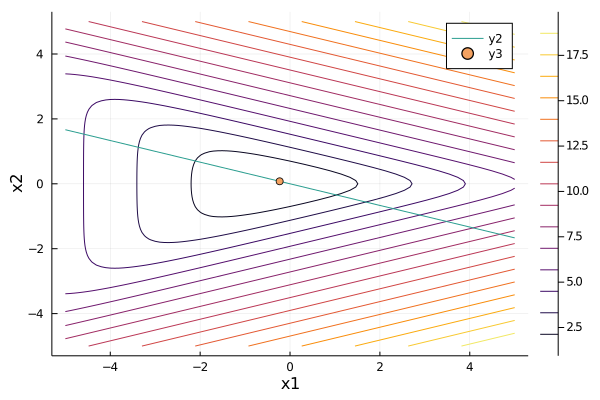

In [21]:
# solve the nonlinear system
contour(-5:0.1:5, -5:0.1:5, (x1, x2)->fnonquadr((x1, x2)), xlabel=:x1, ylabel=:x2)
plot!(x1-> -x1/3, -5, 5, color=mygreen)
x₀ = [-0.0, 0.0]
A = [1 3]
b = [0]
xstar = linear_constrained_newton(fnonquadr, x₀, grad_fnonquadr, hess_fnonquadr, [1 3], [0], verbose=true, t=1)
x1star, x2star = xstar
scatter!([x1star], [x2star], color=myorange)

# References

- Boyd, S. and Vandenberghe, L., '*[Convex Optimization](https://web.stanford.edu/~boyd/cvxbook/bv_cvxbook.pdf)*'. Cambridge University Press (2004)
- Bishop, C., *Pattern Recognition and Machine Learning*. Springer (2006)